# Optimal Skills Analysis

In [1]:
# Importing Libraries
import pandas as pd
import ast 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df =  dataset['train'].to_pandas() # Converting to Pandas DataFrame 

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()


In [4]:
df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])
df_DA_India_exploded = df_DA_India.explode('job_skills')
df_DA_India_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [17]:
df_DA_skills = df_DA_India_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})
df_job_count = len(df_DA_India)
df_DA_skills['skill_percent'] = 100* df_DA_skills['skill_count']/df_job_count
skill_percent = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


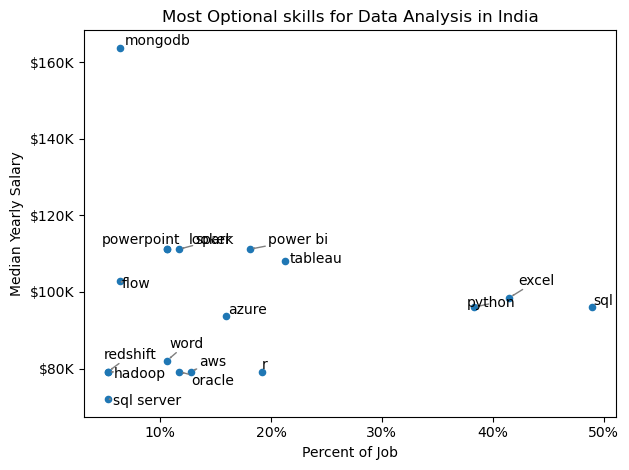

In [29]:
from adjustText import adjust_text
df_DA_skills_high_demand.plot(kind='scatter',x='skill_percent',y='median_salary')

texts=[]
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))

adjust_text(texts,arrowprops=dict(arrowstyle ='->',color='gray'))
plt.xlabel('Percent of Job')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optional skills for Data Analysis in India')
from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()

In [30]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['looker',
  'esquisse',
  'sharepoint',
  'powerbi',
  'cognos',
  'power bi',
  'microstrategy',
  'alteryx',
  'ssrs',
  'sheets',
  'spss',
  'spreadsheet',
  'word',
  'excel',
  'ms access',
  'qlik',
  'ssis',
  'splunk',
  'powerpoint',
  'sap',
  'outlook',
  'dax',
  'datarobot',
  'msaccess',
  'nuix',
  'visio',
  'tableau',
  'sas'],
 'programming': ['rust',
  'kotlin',
  'java',
  'lisp',
  'shell',
  'fortran',
  'visualbasic',
  'css',
  'bash',
  'typescript',
  'php',
  'no-sql',
  'cobol',
  'pascal',
  'c#',
  'go',
  'c',
  'golang',
  'nosql',
  'lua',
  'crystal',
  'sass',
  'mongo',
  'delphi',
  'erlang',
  'scala',
  'groovy',
  'python',
  'ruby',
  'ocaml',
  'swift',
  'matlab',
  'vba',
  'html',
  'haskell',
  'julia',
  'vb.net',
  'perl',
  'javascript',
  'c++',
  'apl',
  'assembly',
  'r',
  'powershell',
  'visual basic',
  't-sql',
  'f#',
  'objective-c',
  'sql',
  'mongodb',
  'clojure',
  'elixir',
  'dart',
  'solidity',
  '

In [34]:
df_technology = pd.DataFrame(list(technology_dict.items()),columns=['technology','skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,looker
0,analyst_tools,esquisse
0,analyst_tools,sharepoint
0,analyst_tools,powerbi
0,analyst_tools,cognos
...,...,...
9,sync,zoom
9,sync,symphony
9,sync,webex
9,sync,slack


In [37]:
df_plot = df_DA_skills_high_demand.merge(df_technology,left_on='job_skills',right_on='skills')

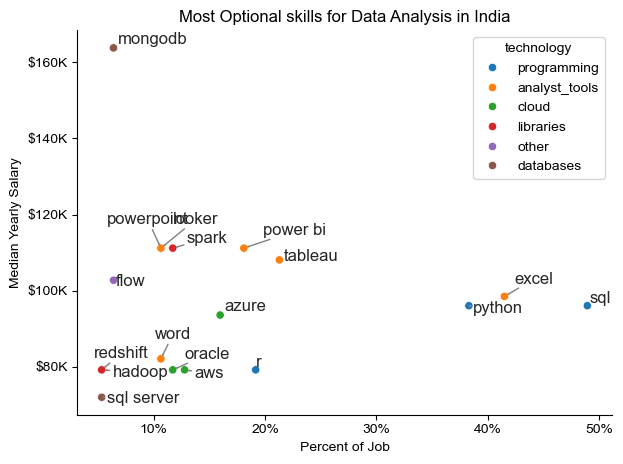

In [40]:
from adjustText import adjust_text
sns.scatterplot(data=df_plot,x='skill_percent',y='median_salary',hue='technology')
sns.despine()
sns.set_theme(style='ticks')

texts=[]
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))

adjust_text(texts,arrowprops=dict(arrowstyle ='->',color='gray'))
plt.xlabel('Percent of Job')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optional skills for Data Analysis in India')
from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()